## Projekt Big Data

Analiza zbioru danych zawierającego informacje na temat uczniów ...
dostępnych na stronie
https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
filename = 'student-mat.csv'
location = 'dane/'
student = pd.read_csv(location + filename)  # sep=',' be default

In [6]:
student

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

Dane zawirają informacje na temat studentów dwóch szkół na kursach matematycznym i języka portugalskiego. Zawierają następujące kolumny:
- school - szkoła ucznia; 'GP' - Gabriela Pereira lub 'MS' - Mousinho da Silveira
- sex - płeć ucznia: 'F' - żeńska, 'M' - męska
- age - wiek: pomiędzy 15 a 22 lata
- address - typ zamieszkania ucznia: 'U' - miejski or 'R' - wiejski
- famsize - liczebność rodziny: 'LE3' - mniejsza lub równa 3 lub 'GT3' - większa niż 3
- Pstatus - status związku rodziców: 'T' - żyją razem lub 'A' - oddzielnie
- Medu - wykształcenie matki: 0 - brak, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education lub 4 – wyższe
- Fedu - wykształcenie ojca; (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - praca matki; 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' lub 'other'
- Fjob - praca ojca: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' lub 'other')
- reason - powód wybrania szkoły: bliska domu - 'home', reputacja szkoły - 'reputation', preferencje kierunku - 'course' lub inne - 'other')
- guardian - opiekun ucznia: matka - 'mother', ojciec - 'father' lub ktoś inny - 'other')
- traveltime - czas trwania drogi z domu do szkoły: 1 - 1 godzin
- studytime - tygodniowy czas nauki: 1 - 10 godzin
- failures - liczba niepowodzeń w nauce w przeszłości: n jeśli 1<=n<3, w pozostałych przypadkach 4)
- schoolsup - dodatkowe wsparcie edukacyjne: tak - yes lub nie - no
- famsup - wsparcie edukacyjne rodziny: tak - yes lub nie - no
- paid - dodatkowe płatne zajęcia w ramach kursu: tak - yes lub nie - no
- activities - zajęcia pozalekcyjne: tak - yes lub nie - no
- nursery - uczęszczanie do przedszkola: tak - yes lub nie - no
- higher - chęć podjęcia wyższych studiów: tak - yes lub nie - no
- internet - dostęp do internetu w domu: tak - yes lub nie - no
- romantic - w relacji romantycznej: tak - yes lub nie - no
- famrel - jakość relacji rodzinnych: od 1 - bardzo złe do 5 - świetne)
- freetime - czas wolny po szkole: od 1 - bardzo mało do 5 - bardzo dużo
- goout - wychodzenie ze znajomymi: od 1 - bardzo rzadko do 5 - bardzo często
- Dalc - konsumpcja alkoholu w dni robocze: od 1 - bardzo mało do 5 - bardzo dużo
- Walc - konsumpcja alkoholu w weekend: od 1 - bardzo mało do 5 - bardzo dużo
- health - aktualny stan zdrowia: od 1 - bardzo zły do 5 - bardzo dobry
- absences - nieobecności w szkole: od 0 do 93
- G1 - ocena za pierwszy okres: od 0 do 20
- G2 - ocena za drugi okres: od 0 do 20
- G3 - ocena końcowa: od 0 do 20

In [7]:
student.shape

(395, 33)

In [25]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
student.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [9]:
student.describe().T

count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
Fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout       395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc        395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc        395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health      395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences    395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G1          395.0  10.908861  3.319195   3.0   8.0  11.0  13.0  19.0
G2          395.0  10.713924  3.761505   0.0   9.0  11.0  13.0  19.0
G3          395.0  10.415190  4.581443   0.0   8.0  11.0  14.0  20.0

Większość zmiennych znajduje się w przedziałach podanych w opisie. Tylko dla dwóch kolumn mamy pewne rozbieżności. Kolumna 'traveltime' przyjmuje wartości od 1 do 4, gdzie według opoisu powinna być w przedziale 1-1 h, ale mógł to być błąd przy opisywaniu, moze chodziło o 1-10 h. Kolumna 'failure' przyjmuje wartości od 0 do 3, natomiast według opisu, powinna mieć wartości od 1 do 4. Ponieważ jest to liczba wcześniejszych "blędów", to jednak liczba 0 mogłaby być możliwa. Należy dokładniej się przyjrzeć danym. 

In [10]:
student[student.traveltime > 1].traveltime.count()

138

In [11]:
138/395

0.3493670886075949

In [17]:
student[student.traveltime == 4].traveltime.count()

8

Ze względu na ilość wartości powyżej 1 zostawiamy dane bez zmian. Sprawdziliśmy jeszcze wartość 4, czy aby nie jest ona jednorazową pomyłką, ale ją też zostawimy. 

In [18]:
student[student.failures ==0].failures.count()

312

In [19]:
student[student.failures == 1].failures.count()

50

In [20]:
student[student.failures == 2].failures.count()

17

In [21]:
student[student.failures == 3].failures.count()

16

In [22]:
student[student.failures == 4].failures.count()

0

In [23]:
312+50+17+16

395

In [24]:
312/395

0.789873417721519

Zatem w praktyce, zmienna 'failures' przyjmuje wartości 0,1,2 i 3. Nie przyjmuje w ogóle wartości 4. Czy moze to być błąd? Albo raczej jaki? Ponad 78% danych przyjmuje wartość 0, która w ogóle nie jest przewidziana według opisu.

Sprawdzamy jeszcze na wykresie, jak przedstawia się rozkład wartości tej zmiennej.

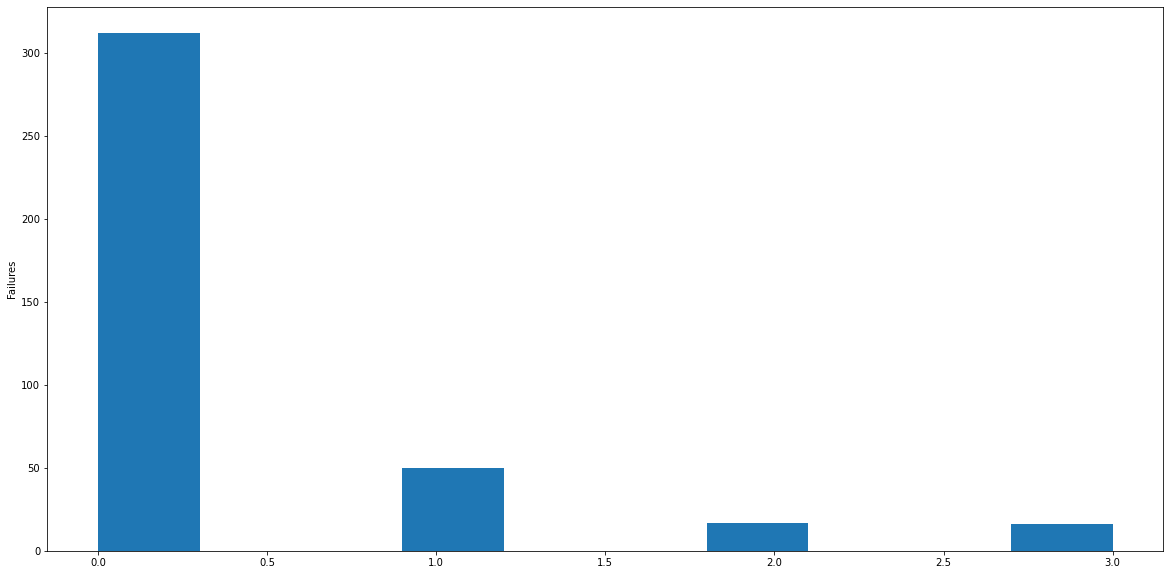

In [26]:
# Rysujemy histogram
plt.figure(figsize=(20,10))
plt.hist(student['failures'].dropna())
plt.ylabel('Failures')
plt.show()

In [27]:
student.describe(include='all')

school  sex         age address famsize Pstatus        Medu  \
count     395  395  395.000000     395     395     395  395.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      349  208         NaN     307     281     354         NaN   
mean      NaN  NaN   16.696203     NaN     NaN     NaN    2.749367   
std       NaN  NaN    1.276043     NaN     NaN     NaN    1.094735   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    3.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob  ...      famrel    freetime       goout  \
count   395.000000    395    395  ...  395.000000  395.000000  395.000000   
unique         NaN      5      5  ...         NaN         NaN         NaN   
top            NaN  other  other  ...         NaN         NaN         NaN   
freq           NaN    141    217  ...         NaN         NaN         NaN   
mean      2.521519    NaN    NaN  ...    3.944304    3.235443    3.108861   
std       1.088201    NaN    NaN  ...    0.896659    0.998862    1.113278   
min       0.000000    NaN    NaN  ...    1.000000    1.000000    1.000000   
25%       2.000000    NaN    NaN  ...    4.000000    3.000000    2.000000   
50%       2.000000    NaN    NaN  ...    4.000000    3.000000    3.000000   
75%       3.000000    NaN    NaN  ...    5.000000    4.000000    4.000000   
max       4.000000    NaN    NaN  ...    5.000000    5.000000    5.000000   

              Dalc        Walc      health    absences          G1  \
count   395.000000  395.000000  395.000000  395.000000  395.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      1.481013    2.291139    3.554430    5.708861   10.908861   
std       0.890741    1.287897    1.390303    8.003096    3.319195   
min       1.000000    1.000000    1.000000    0.000000    3.000000   
25%       1.000000    1.000000    3.000000    0.000000    8.000000   
50%       1.000000    2.000000    4.000000    4.000000   11.000000   
75%       2.000000    3.000000    5.000000    8.000000   13.000000   
max       5.000000    5.000000    5.000000   75.000000   19.000000   

                G2          G3  
count   395.000000  395.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean     10.713924   10.415190  
std       3.761505    4.581443  
min       0.000000    0.000000  
25%       9.000000    8.000000  
50%      11.000000   11.000000  
75%      13.000000   14.000000  
max      19.000000   20.000000  

[11 rows x 33 columns]

In [28]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [29]:
# Wyswietl kolumny, ktore maja jakies braki danych - na wszelki wypadek
student.loc[:, student.isnull().any()]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[395 rows x 0 columns]

Zatem nie mamy braków danych. Zmienne typu 'object' możnaby/należałoby zamienić na 'cathegory'.

Należałoby jeszcze sprawdzić, czy w kolumnach tekstowych nie było błędów pisowni - np. rr zamiast r itp.

In [30]:
# Zmienna sex
student['sex'].unique()

array(['F', 'M'], dtype=object)

In [31]:
# Zmienna school
student['school'].unique()

array(['GP', 'MS'], dtype=object)

In [32]:
# Zmienna adress
student['address'].unique()

array(['U', 'R'], dtype=object)

In [33]:
# Zmienna famsize
student['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

In [34]:
# Zmienna Pstatus
student['Pstatus'].unique()

array(['A', 'T'], dtype=object)

In [35]:
# Zmienna Mjob
student['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [36]:
# Zmienna Fjob
student['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [37]:
# Zmienna reason
student['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [38]:
# Zmienna guardian
student['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [39]:
# Zmienna schoolsup
student['schoolsup'].unique()

array(['yes', 'no'], dtype=object)

In [40]:
# Zmienna famsup
student['famsup'].unique()

array(['no', 'yes'], dtype=object)

In [41]:
# Zmienna nursery
student['nursery'].unique()

array(['yes', 'no'], dtype=object)

In [42]:
# Zmienna paid
student['paid'].unique()

array(['no', 'yes'], dtype=object)

In [43]:
# Zmienna activities
student['activities'].unique()

array(['no', 'yes'], dtype=object)

In [44]:
# Zmienna higher
student['higher'].unique()

array(['yes', 'no'], dtype=object)

In [45]:
# Zmienna internet
student['internet'].unique()

array(['no', 'yes'], dtype=object)

In [46]:
# Zmienna romantic
student['romantic'].unique()

array(['no', 'yes'], dtype=object)

Zamiana typu object na category.

In [ ]:
student.romantic = student.romantic.astype("category")

In [ ]:
student.romantic.value_counts()

no     263
yes    132
Name: romantic, dtype: int64

In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    object  
 1   sex         395 non-null    object  
 2   age         395 non-null    int64   
 3   address     395 non-null    object  
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    object  
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    object  
 9   Fjob        395 non-null    object  
 10  reason      395 non-null    object  
 11  guardian    395 non-null    object  
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    object  
 16  famsup      395 non-null    object  
 17  paid        395 non-null    object  
 18  activities  395 non-null    object  
 19  nursery 

In [ ]:
student.internet = student.internet.astype("category")
student.higher = student.higher.astype("category")
student.nursery = student.nursery.astype("category")
student.activities = student.activities.astype("category")
student.paid = student.paid.astype("category")
student.famsup = student.famsup.astype("category")
student.schoolsup = student.schoolsup.astype("category")
student.guardian = student.guardian.astype("category")
student.reason = student.reason.astype("category")
student.Fjob = student.Fjob.astype("category")
student.Mjob = student.Mjob.astype("category")
student.Pstatus = student.Pstatus.astype("category")
student.famsize = student.famsize.astype("category")
student.address = student.address.astype("category")
student.school = student.school.astype("category")
student.sex = student.sex.astype("category")

In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

# Analiza danych

Import potrzebnych pakietów i ustawienia wykresów.

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns

In [48]:
%matplotlib inline
plt.rc('figure', figsize=(10, 6))
plt.rc('font', family='Arial')

In [49]:
# Rysujemy histogram
plt.figure(figsize=(15,7))
plt.hist(student['G3'].dropna())
plt.ylabel('')
plt.show()

In [60]:
# Spróbujmy teraz wykresu słupkowego przestawiającego ile osób osiągnęło ile punktów
a = student['G3'].value_counts()
x = a.sort_index().index #współrzędne środków słupków
s = 0.5 #szerokość słupka
plt.bar(x-s/2, student['G3'].value_counts().sort_index(), s, color=["0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5", "0.55", "0.6", "0.65", "0.7", "0.75", "0.8", "0.85", "0.9"])
plt.xticks(x-s/2, x, rotation=85)
plt.title("Ilość osób, które zdobyły taką samą ilość punktów")

plt.show() 

In [50]:
# jakie kolory są dostępne
for name, hex in matplotlib.colors.cnames.items():
    print(name + '\t' + hex)

aliceblue	#F0F8FF
antiquewhite	#FAEBD7
aqua	#00FFFF
aquamarine	#7FFFD4
azure	#F0FFFF
beige	#F5F5DC
bisque	#FFE4C4
black	#000000
blanchedalmond	#FFEBCD
blue	#0000FF
blueviolet	#8A2BE2
brown	#A52A2A
burlywood	#DEB887
cadetblue	#5F9EA0
chartreuse	#7FFF00
chocolate	#D2691E
coral	#FF7F50
cornflowerblue	#6495ED
cornsilk	#FFF8DC
crimson	#DC143C
cyan	#00FFFF
darkblue	#00008B
darkcyan	#008B8B
darkgoldenrod	#B8860B
darkgray	#A9A9A9
darkgreen	#006400
darkgrey	#A9A9A9
darkkhaki	#BDB76B
darkmagenta	#8B008B
darkolivegreen	#556B2F
darkorange	#FF8C00
darkorchid	#9932CC
darkred	#8B0000
darksalmon	#E9967A
darkseagreen	#8FBC8F
darkslateblue	#483D8B
darkslategray	#2F4F4F
darkslategrey	#2F4F4F
darkturquoise	#00CED1
darkviolet	#9400D3
deeppink	#FF1493
deepskyblue	#00BFFF
dimgray	#696969
dimgrey	#696969
dodgerblue	#1E90FF
firebrick	#B22222
floralwhite	#FFFAF0
forestgreen	#228B22
fuchsia	#FF00FF
gainsboro	#DCDCDC
ghostwhite	#F8F8FF
gold	#FFD700
goldenrod	#DAA520
gray	#808080
green	#008000
greenyellow	#ADFF2F


In [51]:
grupowanie = student['G3'].groupby(student['sex'])

In [52]:
grupowanie.sum()

sex
F    2073
M    2041
Name: G3, dtype: int64

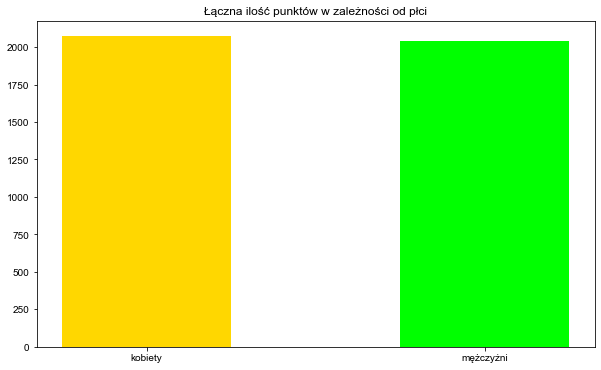

In [59]:
# wykres słupkowy 
# pogrupowane wyniki końcowe w zależności od płci

x = np.arange(len(grupowanie.sum())) #współrzędne środków słupków
s = 0.5 #szerokość słupka
plt.bar(x-s/2, grupowanie.sum(), s, color=["gold","lime"])
plt.xticks(x-s/2, ["kobiety", "mężczyźni"])
plt.title("Łączna ilość punktów w zależności od płci")

plt.show()

Widzimy, że wartości są bardzo podobnej wysokości. Policzmy może wartości średnie, ponieważ może się okazać, że rozróżnienie grup będzie bardzo trudne/niemożliwe.

In [54]:
grupowanie.mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

In [55]:
# wykres słupkowy 

x1 = np.array([0,4]) #współrzędne środków słupków
x2 = np.array([1,5])
x3 = np.array([2,6])
x = np.array([0,1,2,4,5,6])
s = 0.75 #szerokość słupka
e = ["G3 - kobiety", "G2 - kobiety", "G1 - kobiety", "G3 - mężczyźni", "G2 - mężczyźni", "G1 - mężczyźni"]

plt.bar(x1-s/2, student['G3'].groupby(student['sex']).mean(), s, color=["fuchsia","aqua"])
plt.bar(x2-s/2, student['G2'].groupby(student['sex']).mean(), s, color=["hotpink","turquoise"])
plt.bar(x3-s/2, student['G1'].groupby(student['sex']).mean(), s, color=["deeppink","darkturquoise"])
plt.xticks(x-s/2, e, rotation=15)
#plt.xticks(x-s/2, ["G3", "G2", "G1", "G3", "G2", "G1"], rotation=15)
plt.title("Średnia ilość punktów (G3, G2, G1) w zależności od płci")

plt.show()

Zatem średnio, kobiety osiągały mniejsze wyniki niż mężczyźni i to w każdym okresie.

In [61]:
# Zobaczmy wykres punktowy G3 od indeksu może
# potem może klasteryzacja względem płci
plt.scatter(student.index, student.G3)
plt.show()

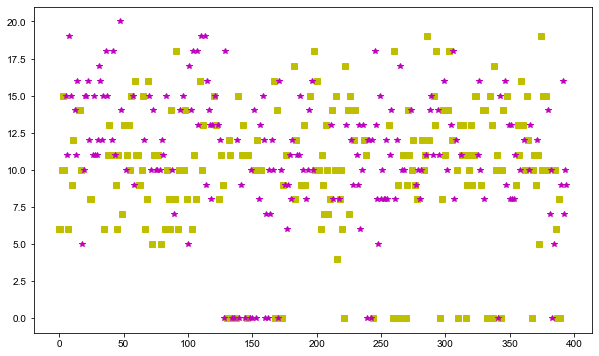

In [62]:
plt.figure()
plt.plot(student.index[student.sex == 'F'], student.G3[student.sex == 'F'], 'ys', label='F') # Żółte kwadraty
plt.plot(student.index[student.sex == 'M'], student.G3[student.sex == 'M'], 'm*', label='M') # Fioletowe gwiazdki
plt.show()
# klasyfikacja czy też klasteryzacja wg płci raczej się nie uda

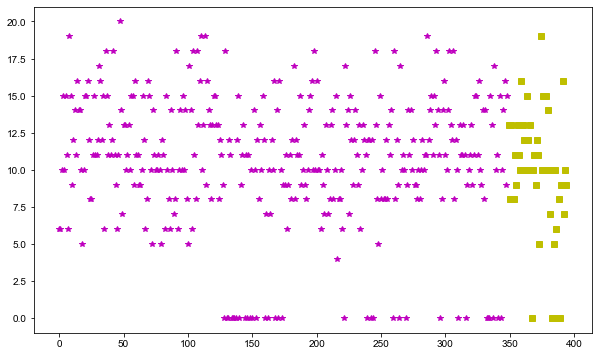

In [68]:
plt.figure()
plt.plot(student.index[student.school == 'MS'], student.G3[student.school == 'MS'], 'ys', label='MS') # Żółte kwadraty
plt.plot(student.index[student.school == 'GP'], student.G3[student.school == 'GP'], 'm*', label='GP') # Fioletowe gwiazdki
plt.show()

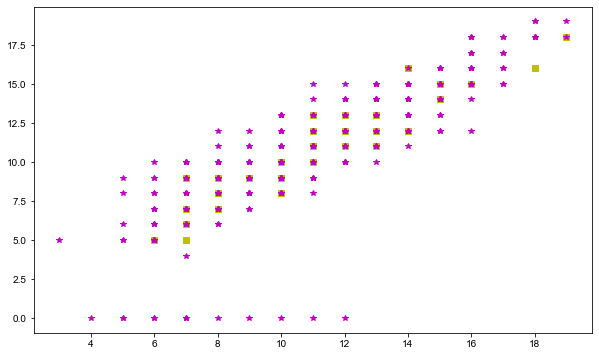

In [69]:
plt.figure()
plt.plot(student.G1[student.school == 'MS'], student.G2[student.school == 'MS'], 'ys', label='MS') # Żółte kwadraty
plt.plot(student.G1[student.school == 'GP'], student.G2[student.school == 'GP'], 'm*', label='GP') # Fioletowe gwiazdki
plt.show()
# chyba trzeba odpuścić klasyfikację/ klasteryzację; moze potem sprawdzić inne zmienne

Dokonujemy wyboru kolumn o wartościach liczbowych.

In [3]:
predykcja1 = student.iloc[:, [2, 6,7, 12, 13, 14, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]
predykcja1.head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  
0     1     1       3         6   5   6   6  
1     1     1       3         4   5   5   6  
2     2     3       3        10   7   8  10  
3     1     1       5         2  15  14  15  
4     1     2       5         4   6  10  10

In [71]:
predykcja1.dtypes

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [73]:
korelacja_P = predykcja1.corr('pearson')
korelacja_P

age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   
absences    0.175230  0.100285  0.024473   -0.012944  -0.062700  0.063726   
G1         -0.064081  0.205341  0.190270   -0.093040   0.160612 -0.354718   
G2         -0.143474  0.215527  0.164893   -0.153198   0.135880 -0.355896   
G3         -0.161579  0.217147  0.152457   -0.117142   0.097820 -0.360415   

              famrel  freetime     goout      Dalc      Walc    health  \
age         0.053940  0.016434  0.126964  0.131125  0.117276 -0.062187   
Medu       -0.003914  0.030891  0.064094  0.019834 -0.047123 -0.046878   
Fedu       -0.001370 -0.012846  0.043105  0.002386 -0.012631  0.014742   
traveltime -0.016808 -0.017025  0.028540  0.138325  0.134116  0.007501   
studytime   0.039731 -0.143198 -0.063904 -0.196019 -0.253785 -0.075616   
failures   -0.044337  0.091987  0.124561  0.136047  0.141962  0.065827   
famrel      1.000000  0.150701  0.064568 -0.077594 -0.113397  0.094056   
freetime    0.150701  1.000000  0.285019  0.209001  0.147822  0.075733   
goout       0.064568  0.285019  1.000000  0.266994  0.420386 -0.009577   
Dalc       -0.077594  0.209001  0.266994  1.000000  0.647544  0.077180   
Walc       -0.113397  0.147822  0.420386  0.647544  1.000000  0.092476   
health      0.094056  0.075733 -0.009577  0.077180  0.092476  1.000000   
absences   -0.044354 -0.058078  0.044302  0.111908  0.136291 -0.029937   
G1          0.022168  0.012613 -0.149104 -0.094159 -0.126179 -0.073172   
G2         -0.018281 -0.013777 -0.162250 -0.064120 -0.084927 -0.097720   
G3          0.051363  0.011307 -0.132791 -0.054660 -0.051939 -0.061335   

            absences        G1        G2        G3  
age         0.175230 -0.064081 -0.143474 -0.161579  
Medu        0.100285  0.205341  0.215527  0.217147  
Fedu        0.024473  0.190270  0.164893  0.152457  
traveltime -0.012944 -0.093040 -0.153198 -0.117142  
studytime  -0.062700  0.160612  0.135880  0.097820  
failures    0.063726 -0.354718 -0.355896 -0.360415  
famrel     -0.044354  0.022168 -0.018281  0.051363  
freetime   -0.058078  0.012613 -0.013777  0.011307  
goout       0.044302 -0.149104 -0.162250 -0.132791  
Dalc        0.111908 -0.094159 -0.064120 -0.054660  
Walc        0.136291 -0.126179 -0.084927 -0.051939  
health     -0.029937 -0.073172 -0.097720 -0.061335  
absences    1.000000 -0.031003 -0.031777  0.034247  
G1         -0.031003  1.000000  0.852118  0.801468  
G2         -0.031777  0.852118  1.000000  0.904868  
G3          0.034247  0.801468  0.904868  1.000000

Widzimy, że największy współczynnik korelacji obserwujemy między wynikami końcowymi (G3) a wynikami z pierwszego i drugiego okresu nauki (G1 i G2).

In [77]:
korelacja_S = predykcja1.corr('spearman')
korelacja_S

age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.161294 -0.149596    0.109804   0.031557  0.236464   
Medu       -0.161294  1.000000  0.631577   -0.147849   0.063498 -0.242373   
Fedu       -0.149596  0.631577  1.000000   -0.154454   0.018429 -0.236616   
traveltime  0.109804 -0.147849 -0.154454    1.000000  -0.105969  0.079917   
studytime   0.031557  0.063498  0.018429   -0.105969   1.000000 -0.157633   
failures    0.236464 -0.242373 -0.236616    0.079917  -0.157633  1.000000   
famrel      0.031380  0.012361  0.011400   -0.038656   0.058141 -0.051389   
freetime    0.000302  0.028493 -0.017132   -0.022279  -0.131321  0.088058   
goout       0.140131  0.064954  0.047961   -0.001430  -0.065979  0.105419   
Dalc        0.097073  0.022729  0.003994    0.066477  -0.217904  0.187492   
Walc        0.132799 -0.044332 -0.014486    0.063654  -0.264021  0.127912   
health     -0.075150 -0.035686  0.018113   -0.015452  -0.091497  0.079688   
absences    0.149276  0.097562  0.003568   -0.025061  -0.046180  0.096028   
G1         -0.057630  0.209662  0.194737   -0.085501   0.162286 -0.346052   
G2         -0.167622  0.236354  0.194844   -0.123795   0.129160 -0.362357   
G3         -0.173438  0.225036  0.170049   -0.120530   0.105170 -0.361224   

              famrel  freetime     goout      Dalc      Walc    health  \
age         0.031380  0.000302  0.140131  0.097073  0.132799 -0.075150   
Medu        0.012361  0.028493  0.064954  0.022729 -0.044332 -0.035686   
Fedu        0.011400 -0.017132  0.047961  0.003994 -0.014486  0.018113   
traveltime -0.038656 -0.022279 -0.001430  0.066477  0.063654 -0.015452   
studytime   0.058141 -0.131321 -0.065979 -0.217904 -0.264021 -0.091497   
failures   -0.051389  0.088058  0.105419  0.187492  0.127912  0.079688   
famrel      1.000000  0.143142  0.063549 -0.106338 -0.116060  0.085341   
freetime    0.143142  1.000000  0.285182  0.194223  0.130246  0.088975   
goout       0.063549  0.285182  1.000000  0.255146  0.393333 -0.018541   
Dalc       -0.106338  0.194223  0.255146  1.000000  0.639906  0.095139   
Walc       -0.116060  0.130246  0.393333  0.639906  1.000000  0.093625   
health      0.085341  0.088975 -0.018541  0.095139  0.093625  1.000000   
absences   -0.086577  0.013397  0.133280  0.129651  0.208508 -0.070132   
G1          0.026433  0.006973 -0.151636 -0.111438 -0.108368 -0.052224   
G2          0.008165 -0.016765 -0.160985 -0.110086 -0.109144 -0.050900   
G3          0.054977 -0.004994 -0.166119 -0.120944 -0.104459 -0.047790   

            absences        G1        G2        G3  
age         0.149276 -0.057630 -0.167622 -0.173438  
Medu        0.097562  0.209662  0.236354  0.225036  
Fedu        0.003568  0.194737  0.194844  0.170049  
traveltime -0.025061 -0.085501 -0.123795 -0.120530  
studytime  -0.046180  0.162286  0.129160  0.105170  
failures    0.096028 -0.346052 -0.362357 -0.361224  
famrel     -0.086577  0.026433  0.008165  0.054977  
freetime    0.013397  0.006973 -0.016765 -0.004994  
goout       0.133280 -0.151636 -0.160985 -0.166119  
Dalc        0.129651 -0.111438 -0.110086 -0.120944  
Walc        0.208508 -0.108368 -0.109144 -0.104459  
health     -0.070132 -0.052224 -0.050900 -0.047790  
absences    1.000000  0.004479 -0.033600  0.017731  
G1          0.004479  1.000000  0.894792  0.878001  
G2         -0.033600  0.894792  1.000000  0.957125  
G3          0.017731  0.878001  0.957125  1.000000

Ponownie widzimy, że dla G3 największe współczynniki są z G1 i G2.

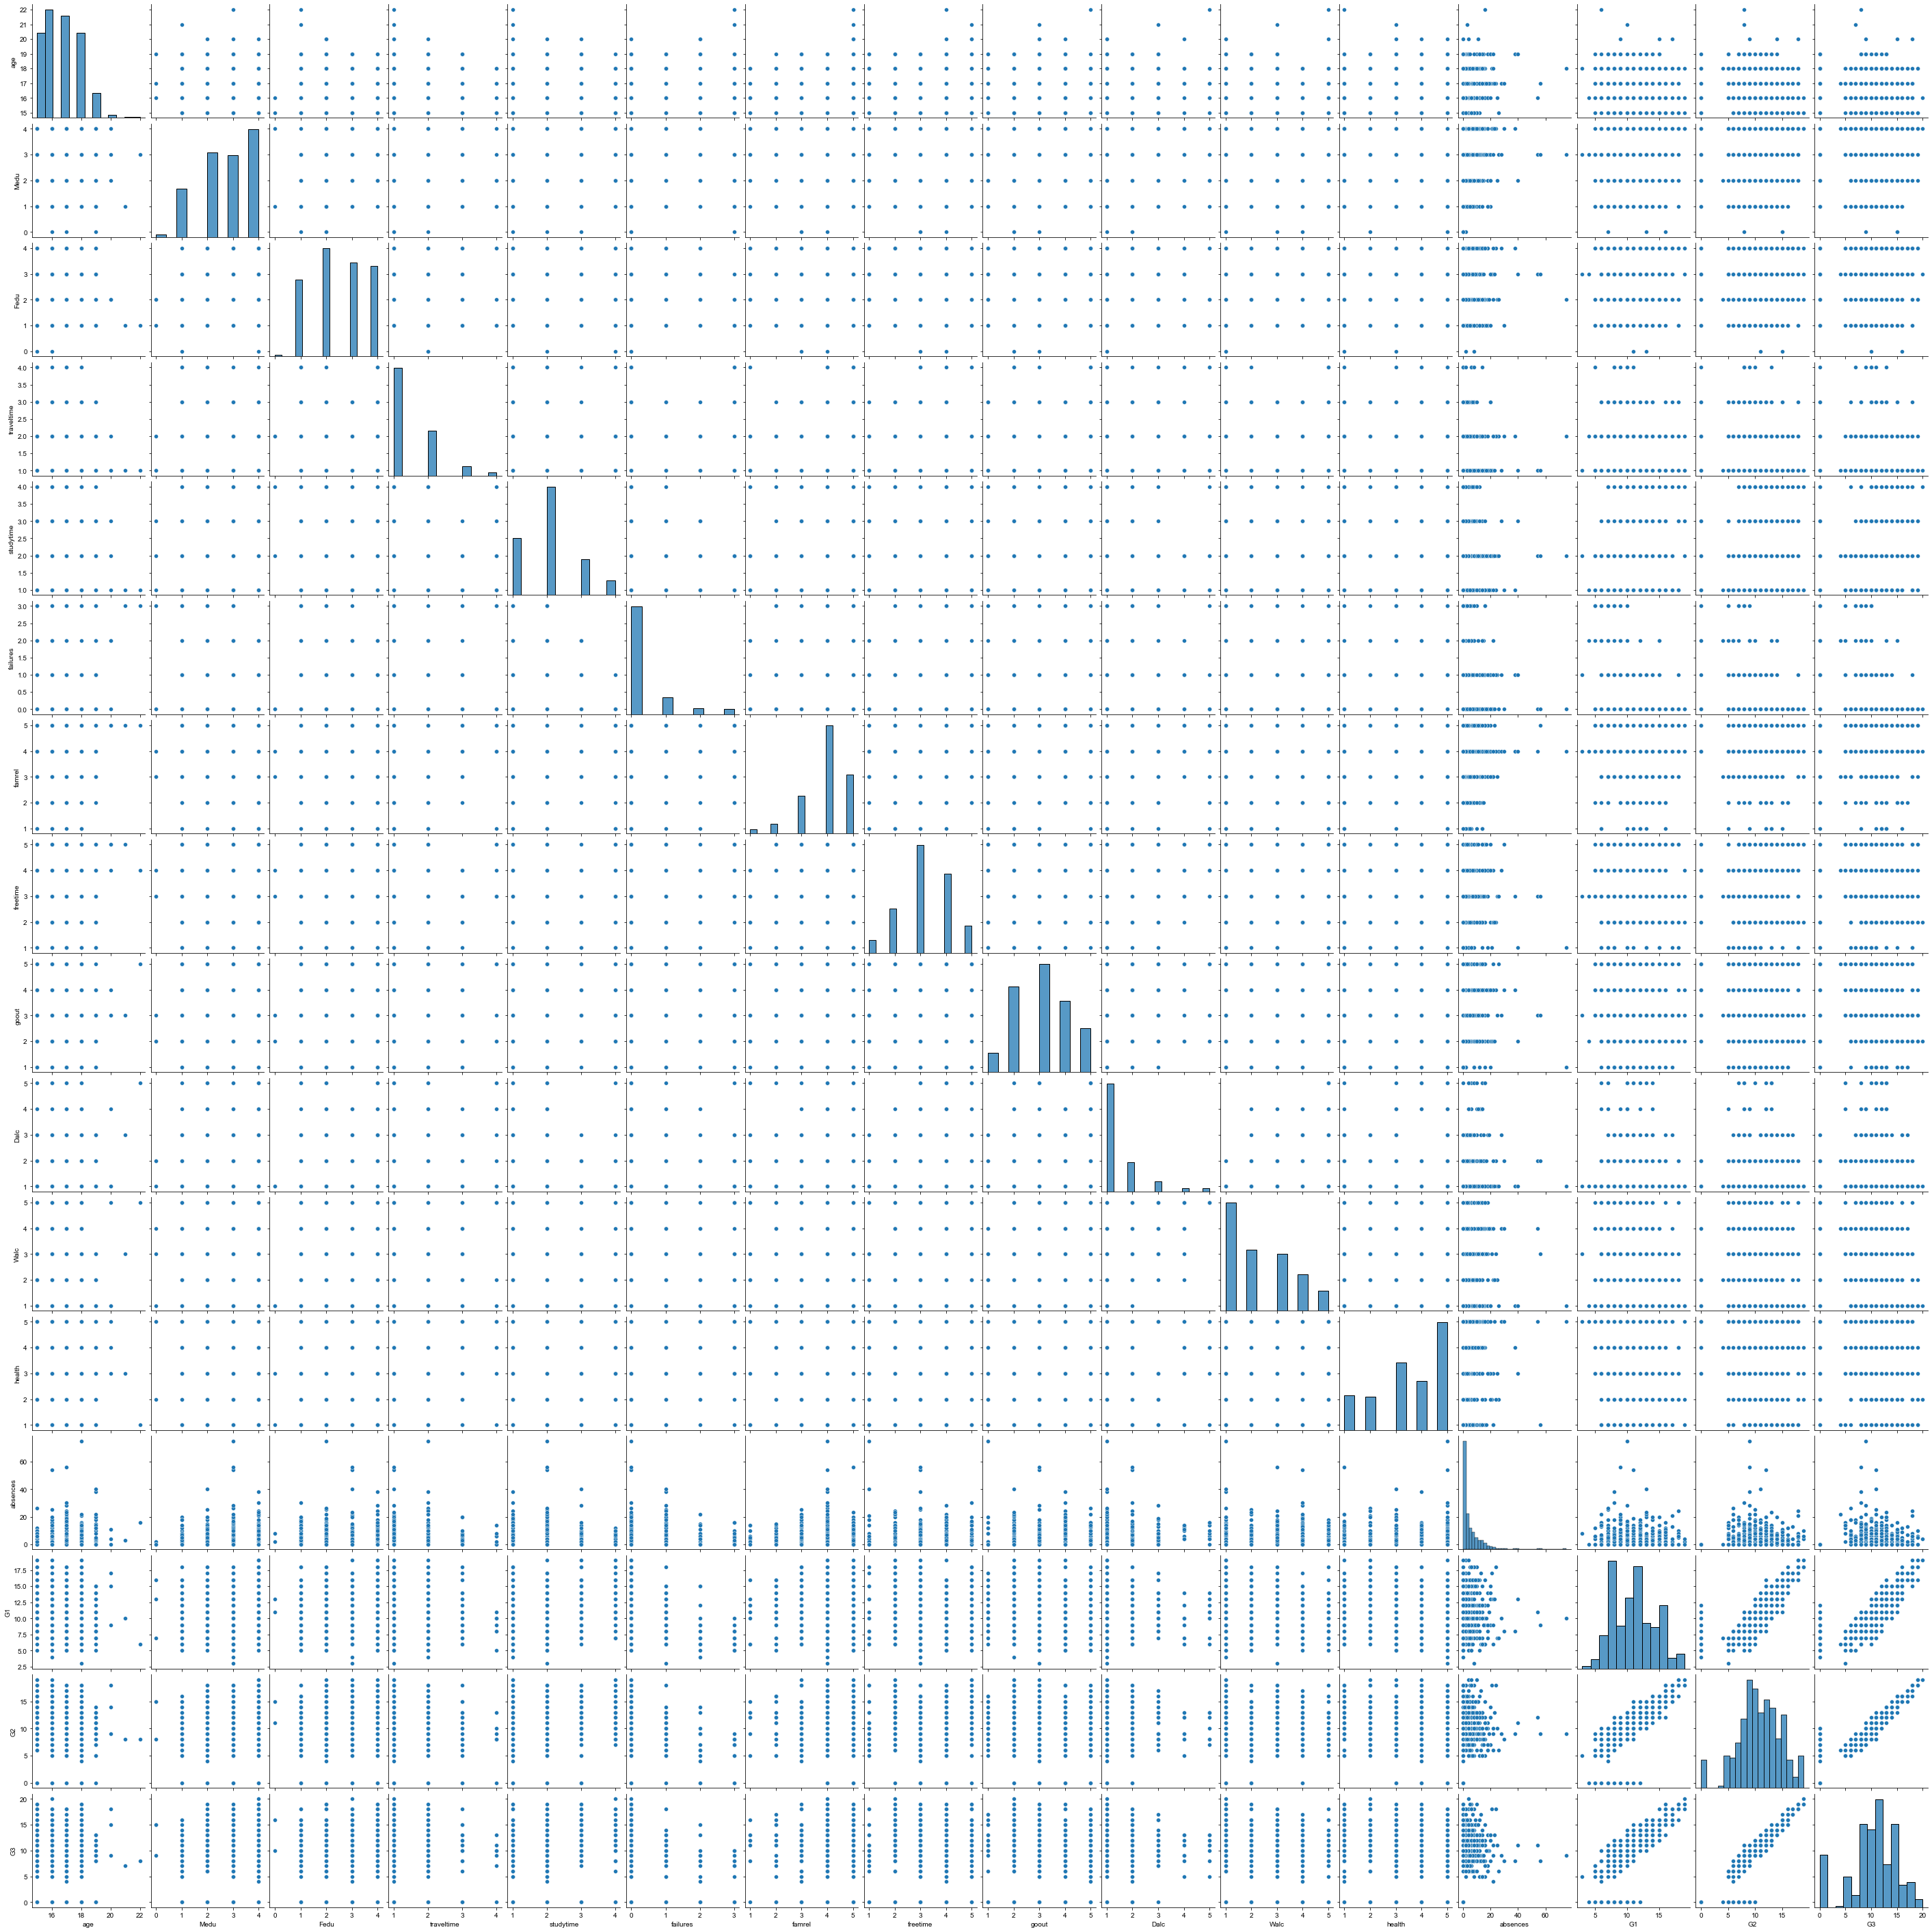

In [78]:
sns.pairplot(student)
plt.show()

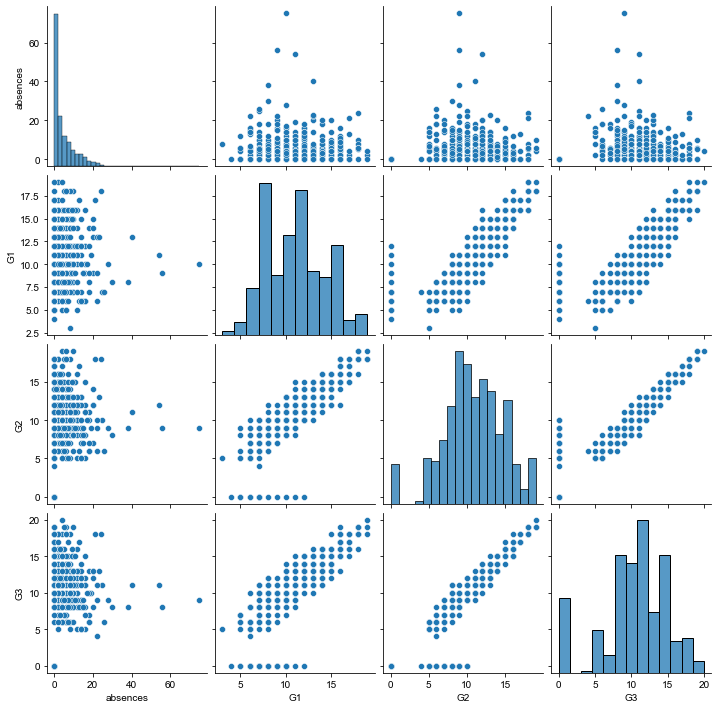

In [79]:
sns.pairplot(student.iloc[:, 29:33])
plt.show()

# Predykcja

In [4]:
import sklearn.linear_model

In [5]:
# tworzymy zbior zmiennych objaśniających
X = predykcja1.iloc[:, 0:15]
X
# ewentualnie: Medu, Fedu i health są chyba kategoryczne tak naprawdę

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  Walc  health  absences  G1  G2  
0        4     1     1       3         6   5   6  
1        3     1     1       3         4   5   5  
2        2     2     3       3        10   7   8  
3        2     1     1       5         2  15  14  
4        2     1     2       5         4   6  10  
..     ...   ...   ...     ...       ...  ..  ..  
390      4     4     5       4        11   9   9  
391      5     3     4       2         3  14  16  
392      3     3     3       3         3  10   8  
393      1     3     4       5         0  11  12  
394      3     3     3       5         5   8   9  

[395 rows x 15 columns]

In [6]:
# oraz zbiór zmiennych objaśnianych
Y = predykcja1.iloc[:, -1]
Y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [7]:
 model = sklearn.linear_model.LinearRegression()

In [8]:
model.fit(X,Y)

LinearRegression()

In [9]:
model.intercept_

-0.6689157838515332

In [10]:
model.coef_

array([-1.81506176e-01,  1.06998211e-01, -1.40423301e-01,  1.27066114e-01,
       -1.36206314e-01, -2.32198539e-01,  3.51640712e-01,  5.37032463e-02,
        4.45748801e-04, -1.20490984e-01,  1.54552554e-01,  5.55570938e-02,
        4.14288885e-02,  1.59034615e-01,  9.74307923e-01])

In [11]:
r2 = sklearn.metrics.r2_score(Y, model.predict(X))
r2

0.8378147296769527

In [12]:
X_ucz, X_test, Y_ucz, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state= 54321)
print(X_ucz.shape)
print(X_test.shape)
print(Y_ucz.shape)
print(Y_test.shape)

(316, 15)
(79, 15)
(316,)
(79,)


In [16]:
help(sklearn.metrics.mean_squared_error)

Help on function mean_squared_error in module sklearn.metrics._regression:

mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
    Mean squared error regression loss
    
    Read more in the :ref:`User Guide <mean_squared_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average']                 or array-like of shape (n_outputs)
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    
        'uniform_av

In [19]:
def fit_regression(model, X_ucz, X_test, Y_ucz, Y_test):
   model.fit(X_ucz, Y_ucz)

   Y_u_pred = model.predict(X_ucz)
   Y_t_pred = model.predict(X_test)

   return {
        "R2_u": sklearn.metrics.r2_score(Y_ucz, Y_u_pred),
        "R2_t": sklearn.metrics.r2_score(Y_test, Y_t_pred),
        "MSE_u": sklearn.metrics.mean_squared_error(Y_ucz, Y_u_pred),
        "MSE_t": sklearn.metrics.mean_squared_error (Y_test, Y_t_pred),
        "MAE_u": sklearn.metrics.mean_absolute_error(Y_ucz, Y_u_pred),
        "MAE_t": sklearn.metrics.mean_absolute_error(Y_test, Y_t_pred),
        "MEDAE_u": sklearn.metrics.median_absolute_error(Y_ucz, Y_u_pred),
        "MEDAE_t": sklearn.metrics.median_absolute_error(Y_test, Y_t_pred)
    }

In [58]:
#przedstawiamy działanie powyższej funkcji oraz wyniki
model_names = ["R. lin."]
result = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz, X_test, Y_ucz, Y_test)]
results_errors = pd.DataFrame(result, index=model_names)

In [21]:
results_errors

R2_u      R2_t     MSE_u     MSE_t     MAE_u     MAE_t   MEDAE_u  \
R. lin.  0.844057  0.781329  3.446448  3.350099  1.167894  1.114558  0.747682   

          MEDAE_t  
R. lin.  0.737044

In [22]:
Xu_std = (X_ucz - X_ucz.mean())/X_ucz.std()
Xt_std = (X_test - X_test.mean())/X_test.std()
Yu_std = (Y_ucz - Y_ucz.mean())/Y_ucz.std()
Yt_std = (Y_test - Y_test.mean())/Y_test.std()

In [59]:
#przedstawiamy działanie powyższej funkcji oraz wyniki dla danych wystandaryzowanych
model_names = ["R. lin. std"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), Xu_std, Xt_std, Yu_std, Yt_std)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))

In [60]:
results_errors

R2_u      R2_t     MSE_u     MSE_t     MAE_u     MAE_t  \
R. lin.      0.844057  0.781329  3.446448  3.350099  1.167894  1.114558   
R. lin. std  0.844057  0.799647  0.155449  0.197817  0.248034  0.289961   

              MEDAE_u   MEDAE_t  
R. lin.      0.747682  0.737044  
R. lin. std  0.158791  0.209387

Możemy jeszcze 'pobawić' się zmianami stosunku zbioru testowego do uczącego, random_state albo normalizacją: x-min/max-min? 

In [25]:
# Spróbujmy normalizacji
# (x - x.min)/(x.max-x.min)
Xu_n = (X_ucz - X_ucz.min())/(X_ucz.max() - X_ucz.min())
Xt_n = (X_test - X_test.min())/(X_test.max() - X_test.min())
Yu_n = (Y_ucz - Y_ucz.min())/(Y_ucz.max() - Y_ucz.min())
Yt_n = (Y_test - Y_test.min())/(Y_test.max() - Y_test.min())

In [61]:
#przedstawiamy działanie powyższej funkcji oraz wyniki dla danych wystandaryzowanych
model_names = ["R. lin. norm"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), Xu_n, Xt_n, Yu_n, Yt_n)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))

In [27]:
results_errors

R2_u      R2_t     MSE_u     MSE_t     MAE_u     MAE_t  \
R. lin.       0.844057  0.781329  3.446448  3.350099  1.167894  1.114558   
R. lin. std   0.844057  0.799647  0.155449  0.197817  0.248034  0.289961   
R. lin. norm  0.844057  0.343709  0.008616  0.031033  0.058395  0.159748   

               MEDAE_u   MEDAE_t  
R. lin.       0.747682  0.737044  
R. lin. std   0.158791  0.209387  
R. lin. norm  0.037384  0.165602

In [28]:
X_ucz_r123, X_test_r123, Y_ucz_r123, Y_test_r123 = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state= 123)

In [62]:
#przedstawiamy działanie powyższej funkcji oraz wyniki dla danych wystandaryzowanych
model_names = ["R. lin. r123"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz_r123, X_test_r123, Y_ucz_r123, Y_test_r123)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))

In [63]:
results_errors

R2_u      R2_t     MSE_u     MSE_t     MAE_u     MAE_t  \
R. lin.       0.844057  0.781329  3.446448  3.350099  1.167894  1.114558   
R. lin. std   0.844057  0.799647  0.155449  0.197817  0.248034  0.289961   
R. lin. norm  0.844057  0.343709  0.008616  0.031033  0.058395  0.159748   
R. lin. r123  0.833213  0.839629  3.400764  3.633617  1.171102  1.310412   

               MEDAE_u   MEDAE_t  
R. lin.       0.747682  0.737044  
R. lin. std   0.158791  0.209387  
R. lin. norm  0.037384  0.165602  
R. lin. r123  0.757220  1.033885

In [31]:
# zostańmy może przy wystandaryzowanych
Xu_std_r123 = (X_ucz_r123 - X_ucz_r123.mean())/X_ucz_r123.std()
Xt_std_r123 = (X_test_r123 - X_test_r123.mean())/X_test_r123.std()
Yu_std_r123 = (Y_ucz_r123 - Y_ucz_r123.mean())/Y_ucz_r123.std()
Yt_std_r123 = (Y_test_r123 - Y_test_r123.mean())/Y_test_r123.std()

In [64]:
#przedstawiamy działanie powyższej funkcji oraz wyniki dla danych wystandaryzowanych
model_names = ["R. lin. std r123"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), Xu_std_r123, Xt_std_r123, Yu_std_r123, Yt_std_r123)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))

In [65]:
results_errors

R2_u      R2_t     MSE_u     MSE_t     MAE_u     MAE_t  \
R. lin.           0.844057  0.781329  3.446448  3.350099  1.167894  1.114558   
R. lin. std       0.844057  0.799647  0.155449  0.197817  0.248034  0.289961   
R. lin. norm      0.844057  0.343709  0.008616  0.031033  0.058395  0.159748   
R. lin. r123      0.833213  0.839629  3.400764  3.633617  1.171102  1.310412   
R. lin. std r123  0.833213  0.838419  0.166259  0.159535  0.258940  0.284551   

                   MEDAE_u   MEDAE_t  
R. lin.           0.747682  0.737044  
R. lin. std       0.158791  0.209387  
R. lin. norm      0.037384  0.165602  
R. lin. r123      0.757220  1.033885  
R. lin. std r123  0.167427  0.233240

In [34]:
# niestety wyniki są podobne jak dla wczesniejszej standaryzacji
# inny random state
X_ucz_r12345, X_test_r12345, Y_ucz_r12345, Y_test_r12345 = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state= 12345)

In [66]:
#przedstawiamy działanie powyższej funkcji oraz wyniki dla danych wystandaryzowanych
model_names = ["R. lin. r12345"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz_r12345, X_test_r12345, Y_ucz_r12345, Y_test_r12345)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))

In [36]:
# zostańmy może przy wystandaryzowanych
Xu_std_r12345 = (X_ucz_r12345 - X_ucz_r12345.mean())/X_ucz_r12345.std()
Xt_std_r12345 = (X_test_r12345 - X_test_r12345.mean())/X_test_r12345.std()
Yu_std_r12345 = (Y_ucz_r12345 - Y_ucz_r12345.mean())/Y_ucz_r12345.std()
Yt_std_r12345 = (Y_test_r12345 - Y_test_r12345.mean())/Y_test_r12345.std()

In [67]:
#przedstawiamy działanie powyższej funkcji oraz wyniki dla danych wystandaryzowanych
model_names = ["R. lin. std r12345"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), Xu_std_r12345, Xt_std_r12345, Yu_std_r12345, Yt_std_r12345)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))

In [68]:
results_errors

R2_u      R2_t     MSE_u     MSE_t     MAE_u  \
R. lin.             0.844057  0.781329  3.446448  3.350099  1.167894   
R. lin. std         0.844057  0.799647  0.155449  0.197817  0.248034   
R. lin. norm        0.844057  0.343709  0.008616  0.031033  0.058395   
R. lin. r123        0.833213  0.839629  3.400764  3.633617  1.171102   
R. lin. std r123    0.833213  0.838419  0.166259  0.159535  0.258940   
R. lin. r12345      0.833376  0.850740  3.460264  3.226082  1.154125   
R. lin. std r12345  0.833376  0.855479  0.166097  0.142691  0.252859   

                       MAE_t   MEDAE_u   MEDAE_t  
R. lin.             1.114558  0.747682  0.737044  
R. lin. std         0.289961  0.158791  0.209387  
R. lin. norm        0.159748  0.037384  0.165602  
R. lin. r123        1.310412  0.757220  1.033885  
R. lin. std r123    0.284551  0.167427  0.233240  
R. lin. r12345      1.186329  0.743559  0.861169  
R. lin. std r12345  0.256375  0.162908  0.202406

In [39]:
#model wielomianowy
#korzystamy z funkcji PolynomialFeatures ze stopniem 2,
#aby wygenerować nowe cechy, które są iloczynem cech bazowych,
#np. [x1,x2,x3] -> [x1, x2, x3, x1^2, x1x2, x1x3, x2^2, x2x3, x3^2]

import sklearn.preprocessing
wielomian2 = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X2_ucz = wielomian2.fit_transform(Xu_std_r12345)
X2_test = wielomian2.fit_transform(Xt_std_r12345)

#Yu_std_r12345; Yt_std_r12345

In [55]:
help(sklearn.preprocessing.PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._data:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Parameters
 |  ----------
 |  degree : integer
 |      The degree of the polynomial features. Default = 2.
 |  
 |  interaction_only : boolean, default = False
 |      If true, only interaction features are produced: features that are
 |      products of at most ``degree`` *distinct* input features (so not
 |      ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).
 |  
 |  include_bias : boo

In [69]:
 model_names = ["Reg. lin polyf"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), X2_ucz, X2_test, Yu_std_r12345, Yt_std_r12345)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))

In [70]:
results_errors

R2_u      R2_t     MSE_u     MSE_t     MAE_u  \
R. lin.             0.844057  0.781329  3.446448  3.350099  1.167894   
R. lin. std         0.844057  0.799647  0.155449  0.197817  0.248034   
R. lin. norm        0.844057  0.343709  0.008616  0.031033  0.058395   
R. lin. r123        0.833213  0.839629  3.400764  3.633617  1.171102   
R. lin. std r123    0.833213  0.838419  0.166259  0.159535  0.258940   
R. lin. r12345      0.833376  0.850740  3.460264  3.226082  1.154125   
R. lin. std r12345  0.833376  0.855479  0.166097  0.142691  0.252859   
Reg. lin polyf      0.911669  0.723481  0.088052  0.273019  0.217781   

                       MAE_t   MEDAE_u   MEDAE_t  
R. lin.             1.114558  0.747682  0.737044  
R. lin. std         0.289961  0.158791  0.209387  
R. lin. norm        0.159748  0.037384  0.165602  
R. lin. r123        1.310412  0.757220  1.033885  
R. lin. std r123    0.284551  0.167427  0.233240  
R. lin. r12345      1.186329  0.743559  0.861169  
R. lin. std r12345  0.256375  0.162908  0.202406  
Reg. lin polyf      0.359691  0.176408  0.252190

In [42]:
# Redukcja zmiennych modelu
# Jednym z możliwości jest BIC z zajęć
# robiliśmy to dla regresji wielomianowej

#wyboru zmiennych do modelu możemy dokonać korzystając z kryterium Schwarza (BIC - Bayesian Information Criterion)
#wybieramy taki model regresji, który minimalizuje
#BIC(MSE_p, p, n) = n*log(MSE_p) + p*log(n)
#MSE_p jest liczone dla modelu zbudowanego na podstawie p<=d zmiennych
#p*log(n) to kara za złożoność modelu

def BIC(mse, p, n):
    return n*np.log(mse) + p*np.log(n)

In [43]:
#liczba wszystkich możliwych przypadków do rozpatrzenia jest rzędu 2^d
#1. zaczynamy od modelu pustego. BIC wynosi +nieskończoność
#2. rozszerzamy model o zmienną, dla której BIC jest najmniejsza i
#   jednocześnie zmniejsza aktualną wartość BIC - jeśli takiej nie ma zwracamy aktualny model
#3. powtarzamy 2. aż do wyczerpania możliwości

In [44]:
def forward_selection(X, y):
    n, m = X.shape
    best_idx = []
    best_free = set(range(m))
    best_fit = np.inf
    res = []
    
    for i in range(0, m):
        cur_idx = -1
        cur_fit = np.inf
        for e in best_free:
            r = sklearn.linear_model.LinearRegression()
            test_idx = best_idx + [e]
            r.fit(X[test_idx], y)
            test_fit = BIC(sklearn.metrics.mean_squared_error(y, r.predict(X[test_idx])), i+2, n)
            if test_fit < cur_fit: cur_idx, cur_fit = e, test_fit
        if cur_fit > best_fit: break
        
        best_idx, best_fit = best_idx + [cur_idx], cur_fit
        best_free.discard(cur_idx)
        res.append((cur_idx, cur_fit))
    return res

In [45]:
#stosujemy algorytm wyboru zmiennych do zbioru przekształconego wielomianowo
# X2_ucz, X2_test, Yu_std_r12345, Yt_std_r12345
wybrane_df = pd.DataFrame(forward_selection(X2_ucz, Yu_std_r12345), columns=["zmienna", "BIC"])

wybrane_zmienne = wybrane_df["zmienna"].tolist()

wybrane_df["nazwa"] = [X.columns[w>=1].append(X.columns[w==2]).str.cat(sep="*") for w in wielomian2.powers_[wybrane_zmienne]]

wybrane_df

ValueError: Found input variables with inconsistent numbers of samples: [1, 316]

In [54]:
#forward_selection(X2_ucz, Yu_std_r12345)
n, m = X2_ucz.shape
    #best_idx = []
    best_free = set(range(m))
    #best_fit = np.inf
    #res = []
    
    #for i in range(0, m):
     #   cur_idx = -1
      #  cur_fit = np.inf
       # for e in best_free:
       #     r = sklearn.linear_model.LinearRegression()
      #      test_idx = best_idx + [e]
      #      r.fit(X[test_idx], y)
      #      test_fit = BIC(sklearn.metrics.mean_squared_error(y, r.predict(X[test_idx])), i+2, n)
      #      if test_fit < cur_fit: cur_idx, cur_fit = e, test_fit
      #  if cur_fit > best_fit: break
        
      #  best_idx, best_fit = best_idx + [cur_idx], cur_fit
      #  best_free.discard(cur_idx)
      #  res.append((cur_idx, cur_fit))

IndentationError: unexpected indent (<ipython-input-54-2bb95412a548>, line 4)

Zatem powinno wystarczyć/ Najlepsze dopasowani wg BIC otrzymamy dla powyższych trzech kolumn: G2, famrel i absences.

In [ ]:
#dodajemy kolejny wiersz do ramki danych z oceną jakości modelu
model_names = ["Reg. liniowa BIC"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X2_ucz[:, wybrane_zmienne],
                      X2_test[:, wybrane_zmienne],
                      Y_ucz,
                      Y_test)]
results_errors = results_errors.append(pd.DataFrame(res, index=model_names))

In [ ]:
results_errors

r2_u      r2_t     MSE_u  ...     MAE_t   MEDAE_u   MEDAE_t
R. lin.             0.844057  0.781329  3.446448  ...  1.114558  0.747682  0.737044
R. lin. std         0.844057  0.799647  0.155449  ...  0.289961  0.158791  0.209387
R. lin. std         0.844057  0.799647  0.155449  ...  0.289961  0.158791  0.209387
R. lin. r123        0.833213  0.839629  3.400764  ...  1.310412  0.757220  1.033885
R. lin. std r123    0.833213  0.838419  0.166259  ...  0.284551  0.167427  0.233240
R. lin. r12345      0.833376  0.850740  3.460264  ...  1.186329  0.743559  0.861169
R. lin. std r12345  0.833376  0.855479  0.166097  ...  0.256375  0.162908  0.202406
Reg. liniowa BIC    0.832476  0.786922  3.702410  ...  1.068378  0.723330  0.630164

[8 rows x 8 columns]

In [ ]:
# zdecydowanie gorzej
# może spróbować standaryzacji?
Xu_std_BIC = (X2_ucz[:, wybrane_zmienne] - X2_ucz[:, wybrane_zmienne].mean())/X2_ucz[:, wybrane_zmienne].std()
Xt_std_BIC = (X2_test[:, wybrane_zmienne] - X2_test[:, wybrane_zmienne].mean())/X2_test[:, wybrane_zmienne].std()
Yu_std_BIC = (Y_ucz - Y_ucz.mean())/Y_ucz.std()
Yt_std_BIC = (Y_test - Y_test.mean())/Y_test.std()

In [ ]:
#przedstawiamy działanie powyższej funkcji oraz wyniki dla danych wystandaryzowanych
model_names = ["R. lin. std BIC"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), Xu_std_BIC, Xt_std_BIC, Yu_std_BIC, Yt_std_BIC)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))

In [ ]:
results_errors

r2_u      r2_t     MSE_u  ...     MAE_t   MEDAE_u   MEDAE_t
R. lin.             0.844057  0.781329  3.446448  ...  1.114558  0.747682  0.737044
R. lin. std         0.844057  0.799647  0.155449  ...  0.289961  0.158791  0.209387
R. lin. std         0.844057  0.799647  0.155449  ...  0.289961  0.158791  0.209387
R. lin. r123        0.833213  0.839629  3.400764  ...  1.310412  0.757220  1.033885
R. lin. std r123    0.833213  0.838419  0.166259  ...  0.284551  0.167427  0.233240
R. lin. r12345      0.833376  0.850740  3.460264  ...  1.186329  0.743559  0.861169
R. lin. std r12345  0.833376  0.855479  0.166097  ...  0.256375  0.162908  0.202406
Reg. liniowa BIC    0.832476  0.786922  3.702410  ...  1.068378  0.723330  0.630164
R. lin. std BIC     0.832476  0.722345  0.166994  ...  0.341643  0.153619  0.252067

[9 rows x 8 columns]

In [ ]:
# wyniki niestety gorsze niż wcześniej
# a co jakby spróbować BIC na r123 lub 12345?

# Właściwie to dla Rlin r12345 std są najlepsze wyniki jeśli chodzi o błędy ogólnikowo - w BIC wystandaryzowanym jest lepiej dla uczącego ale gorzej dla testowego

# Klasyfikacja uczniów ze względu na wyniki końcowe

In [71]:
student.G3.value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

In [73]:
# Na początku weźmy może podział: G3<12 (60%) to zły, G3>=12 - dobry uczeń.
student["ocena"] = pd.cut(student["G3"], [-1,12,20],labels=["zły", "dobry"])
student["ocena"].value_counts()

zły      264
dobry    131
Name: ocena, dtype: int64

In [75]:
student.iloc[:10, :]

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... freetime goout  Dalc  Walc  health absences  G1  G2  G3  ocena  
0  ...        3     4     1     1       3        6   5   6   6    zły  
1  ...        3     3     1     1       3        4   5   5   6    zły  
2  ...        3     2     2     3       3       10   7   8  10    zły  
3  ...        2     2     1     1       5        2  15  14  15  dobry  
4  ...        3     2     1     2       5        4   6  10  10    zły  
5  ...        4     2     1     2       5       10  15  15  15  dobry  
6  ...        4     4     1     1       3        0  12  12  11    zły  
7  ...        1     4     1     1       1        6   6   5   6    zły  
8  ...        2     2     1     1       1        0  16  18  19  dobry  
9  ...        5     1     1     1       5        0  14  15  15  dobry  

[10 rows x 34 columns]

In [77]:
# możemy zamienić to na 0-1
# 0 - zły; 1 - dobry
y = student["ocena"]
y01 = y.cat.codes.values 

In [78]:
y01[:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int8)

In [79]:
 import sklearn.model_selection

In [80]:
# zostajemy przy X jako zbiorze liczbowym, bez G3 bo wg niego dzielimy uczniów, więc mamy cały czas X = predykcja1.iloc[:,0:15]
X

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  Walc  health  absences  G1  G2  
0        4     1     1       3         6   5   6  
1        3     1     1       3         4   5   5  
2        2     2     3       3        10   7   8  
3        2     1     1       5         2  15  14  
4        2     1     2       5         4   6  10  
..     ...   ...   ...     ...       ...  ..  ..  
390      4     4     5       4        11   9   9  
391      5     3     4       2         3  14  16  
392      3     3     3       3         3  10   8  
393      1     3     4       5         0  11  12  
394      3     3     3       5         5   8   9  

[395 rows x 15 columns]

In [81]:
np.arange(X.shape[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [82]:
# podział na zbiór uczący i testowy
i_ucz, i_test = sklearn.model_selection.train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=12345)
X_ucz, X_test = X.iloc[i_ucz, :], X.iloc[i_test, :]
y_ucz, y_test = y[i_ucz], y[i_test]
y01_ucz, y01_test = y01[i_ucz], y01[i_test]

In [83]:
print(X_ucz.shape, X_test.shape, y_ucz.shape, y_test.shape)

(316, 15) (79, 15) (316,) (79,)


In [84]:
y_ucz

206      zły
186      zły
368      zły
130      zły
87     dobry
       ...  
34     dobry
357      zły
382      zły
129    dobry
285      zły
Name: ocena, Length: 316, dtype: category
Categories (2, object): ['zły' < 'dobry']

In [85]:
y_ucz.value_counts()

zły      215
dobry    101
Name: ocena, dtype: int64

In [86]:
101/395

0.25569620253164554

In [87]:
import sklearn.neighbors

In [88]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_ucz, y01_ucz)

KNeighborsClassifier()

In [89]:
 y01_pred_ucz = knn.predict(X_ucz)

In [90]:
 y01_pred_ucz[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int8)

In [91]:
y01_ucz[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int8)

In [92]:
 y01_pred = knn.predict(X_test)

In [93]:
y01_pred[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int8)

In [94]:
y01_test[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int8)

In [95]:
import sklearn.metrics

In [96]:
sklearn.metrics.accuracy_score(y01_ucz, y01_pred_ucz)

0.9588607594936709

In [97]:
sklearn.metrics.accuracy_score(y01_test, y01_pred)

0.8481012658227848

In [98]:
#macierz pomyłek [[true negative, false positive], [false negative, true positive]]
sklearn.metrics.confusion_matrix(y01_ucz, y01_pred_ucz)

array([[213,   2],
       [ 11,  90]], dtype=int64)

Tak jak przy predykcji, możemy stworzyć funkcję, która policzy nam wybrane metryki i zapisze je do ramki danych.

In [99]:
def metryki(model, X_ucz, X_test, y_ucz, y_test):
   model.fit(X_ucz, y01_ucz)

   y_pred_ucz = model.predict(X_ucz)
   y_pred_test = model.predict(X_test)

   return {
       "acc_u": sklearn.metrics.accuracy_score(y_ucz, y_pred_ucz),
       "acc_t": sklearn.metrics.accuracy_score(y_test, y_pred_test),
       "f1_u": sklearn.metrics.f1_score(y_ucz, y_pred_ucz),
       "f1_t": sklearn.metrics.f1_score(y_test, y_pred_test),
       "prec_u": sklearn.metrics.precision_score(y_ucz, y_pred_ucz),
       "prec_t": sklearn.metrics.precision_score(y_test, y_pred_test),
       "rcal_u": sklearn.metrics.recall_score(y_ucz, y_pred_ucz),
       "rcal_t": sklearn.metrics.recall_score(y_test, y_pred_test)
    }

In [159]:
#tworzymy ramkę danych
nazwa = ["knn"]
rezultat = [metryki(sklearn.neighbors.KNeighborsClassifier(), X_ucz, X_test, y01_ucz, y01_test)]
df_rezultaty = pd.DataFrame(rezultat, index=nazwa)

In [109]:
df_rezultaty

acc_u     acc_t      f1_u      f1_t    prec_u    prec_t    rcal_u  \
knn  0.958861  0.848101  0.932642  0.769231  0.978261  0.909091  0.891089   

       rcal_t  
knn  0.666667

Próbujemy teraz zmienne wystandaryzowane, znormalizowane, inne random state, może inny podział, żeby zobaczyć jak będą się zmieniać metryki.

In [110]:
#standaryzujemy dane
X_ucz_std = (X_ucz - X_ucz.mean())/X_ucz.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

In [160]:
nazwa = ["knn std"]
rezultat = [metryki(sklearn.neighbors.KNeighborsClassifier(), X_ucz_std, X_test_std, y01_ucz, y01_test)] #X_ucz_std, X_test_std, y01_ucz_std, y01_test_std
df_rezultaty = df_rezultaty.append(pd.DataFrame(rezultat, index=nazwa))

In [112]:
df_rezultaty

acc_u     acc_t      f1_u      f1_t    prec_u    prec_t    rcal_u  \
knn      0.958861  0.848101  0.932642  0.769231  0.978261  0.909091  0.891089   
knn std  0.936709  0.848101  0.893617  0.769231  0.965517  0.909091  0.831683   

           rcal_t  
knn      0.666667  
knn std  0.666667

In [161]:
# normalizacja
nazwa = ["knn norm"]
rezultat = [metryki(sklearn.neighbors.KNeighborsClassifier(), (X_ucz - X_ucz.min())/(X_ucz.max() - X_ucz.min()) , (X_test - X_test.min())/(X_test.max() - X_test.min()), y01_ucz, y01_test)] #X_ucz_std, X_test_std, y01_ucz_std, y01_test_std
df_rezultaty = df_rezultaty.append(pd.DataFrame(rezultat, index=nazwa))

In [162]:
df_rezultaty

acc_u     acc_t      f1_u      f1_t    prec_u    prec_t  \
knn       0.958861  0.848101  0.932642  0.769231  0.978261  0.909091   
knn std   0.936709  0.848101  0.893617  0.769231  0.965517  0.909091   
knn norm  0.920886  0.797468  0.864865  0.692308  0.952381  0.818182   

            rcal_u    rcal_t  
knn       0.891089  0.666667  
knn std   0.831683  0.666667  
knn norm  0.792079  0.600000

In [123]:
# niestety pogorszyliśmy sobie rezultaty
# powtórzmy teraz wszystko dla innego random state

# podział na zbiór uczący i testowy
i_ucz123, i_test123 = sklearn.model_selection.train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=123)
X_ucz123, X_test123 = X.iloc[i_ucz123, :], X.iloc[i_test123, :]
y_ucz123, y_test123 = y[i_ucz123], y[i_test123]
y01_ucz123, y01_test123 = y01[i_ucz123], y01[i_test123]

In [163]:
nazwa = ["knn 123"]
rezultat = [metryki(sklearn.neighbors.KNeighborsClassifier(), X_ucz123, X_test123, y01_ucz123, y01_test123)] 
df_rezultaty = df_rezultaty.append(pd.DataFrame(rezultat, index=nazwa))

In [130]:
df_rezultaty

acc_u     acc_t      f1_u      f1_t    prec_u    prec_t  \
knn       0.958861  0.848101  0.932642  0.769231  0.978261  0.909091   
knn std   0.936709  0.848101  0.893617  0.769231  0.965517  0.909091   
knn norm  0.920886  0.797468  0.864865  0.692308  0.952381  0.818182   
knn 123   0.601266  0.556962  0.267442  0.222222  0.315068  0.384615   

            rcal_u    rcal_t  
knn       0.891089  0.666667  
knn std   0.831683  0.666667  
knn norm  0.792079  0.600000  
knn 123   0.232323  0.156250

Zdecydowane pogorszenie wyników.

Następnie szukamy optymalnej ilości sąsiadów. Zaczynamy od stworzenia list z wartosciami metryk dla różnej ilości sąsiadów.

In [134]:
tab_train = list()
tab_test = list()
for i in range(1,21):
    klasyfikator = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i) #tworzenie modelu
    print(klasyfikator)
    klasyfikator.fit(X_ucz, y01_ucz) #trenowanie modelu
    
    Y_tr_pred = klasyfikator.predict(X_ucz)
    Y_pred = klasyfikator.predict(X_test) #klasyfikacja zmiennej celu dla zbioru testowego
    
    tab_train.append(sklearn.metrics.recall_score(y01_ucz, Y_tr_pred))
    tab_test.append(sklearn.metrics.recall_score(y01_test, Y_pred))

KNeighborsClassifier(n_neighbors=1)
KNeighborsClassifier(n_neighbors=2)
KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(n_neighbors=4)
KNeighborsClassifier()
KNeighborsClassifier(n_neighbors=6)
KNeighborsClassifier(n_neighbors=7)
KNeighborsClassifier(n_neighbors=8)
KNeighborsClassifier(n_neighbors=9)
KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifier(n_neighbors=11)
KNeighborsClassifier(n_neighbors=12)
KNeighborsClassifier(n_neighbors=13)
KNeighborsClassifier(n_neighbors=14)
KNeighborsClassifier(n_neighbors=15)
KNeighborsClassifier(n_neighbors=16)
KNeighborsClassifier(n_neighbors=17)
KNeighborsClassifier(n_neighbors=18)
KNeighborsClassifier(n_neighbors=19)
KNeighborsClassifier(n_neighbors=20)


Narysujemy teraz utworzone listy na jednym wykresie. Zobaczymy, dla jakiej ilości sąsiadów uzyskane wyniki są najbardziej podobne.

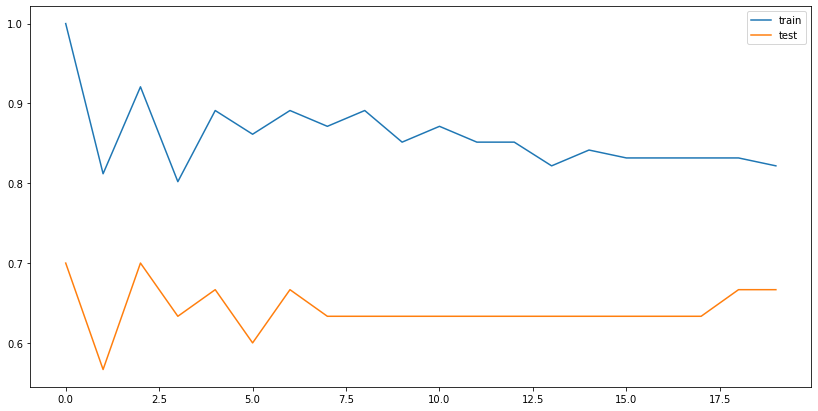

In [135]:
plt.figure(figsize=(14,7))
plt.plot(tab_train, label='train')
plt.plot(tab_test, label='test')
plt.legend()
plt.show()

In [136]:
tab_train = list()
tab_test = list()
for i in range(1,21):
    klasyfikator = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i) #tworzenie modelu

    klasyfikator.fit(X_ucz, y01_ucz) #trenowanie modelu
    
    Y_tr_pred = klasyfikator.predict(X_ucz)
    Y_pred = klasyfikator.predict(X_test) #klasyfikacja zmiennej celu dla zbioru testowego
    
    tab_train.append(sklearn.metrics.f1_score(y01_ucz, Y_tr_pred))
    tab_test.append(sklearn.metrics.f1_score(y01_test, Y_pred))

plt.figure(figsize=(14,7))
plt.plot(tab_train, label='train')
plt.plot(tab_test, label='test')
plt.legend()
plt.show()

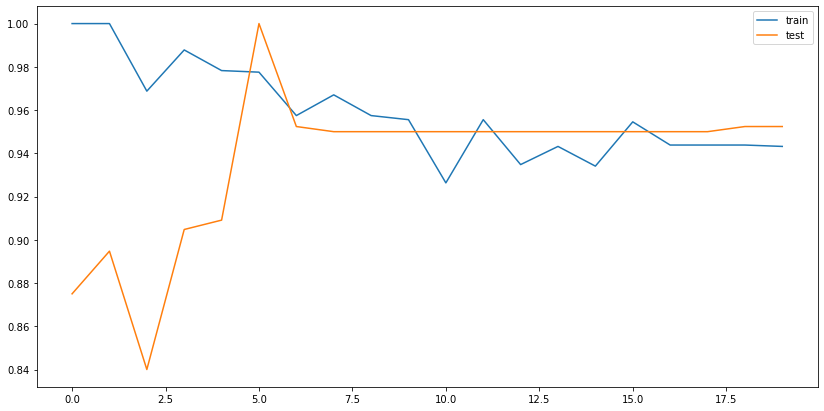

In [137]:
tab_train = list()
tab_test = list()
for i in range(1,21):
    klasyfikator = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i) #tworzenie modelu

    klasyfikator.fit(X_ucz, y01_ucz) #trenowanie modelu
    
    Y_tr_pred = klasyfikator.predict(X_ucz)
    Y_pred = klasyfikator.predict(X_test) #klasyfikacja zmiennej celu dla zbioru testowego
    
    tab_train.append(sklearn.metrics.precision_score (y01_ucz, Y_tr_pred))
    tab_test.append(sklearn.metrics.precision_score(y01_test, Y_pred))

plt.figure(figsize=(14,7))
plt.plot(tab_train, label='train')
plt.plot(tab_test, label='test')
plt.legend()
plt.show()

Spróbujemy teraz dobrać odpoweidnią liczbę sąsiadów za pomocą funkcji GridSearchCV.

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
help(sklearn.neighbors.KNeighborsClassifier()) # sprawdzamy jakie mamy możliwości

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of 

In [148]:
# od 5 do 7?
wybor = [
  {'algorithm': ['auto', 'ball_tree', 'brute'], 'n_neighbors': range(5,7), 'weights': ['uniform', 'distance']}
 ]

In [149]:
scorer = {'f1': 'f1', 'rec': 'recall', 'prec': 'precision'}

In [150]:
 search_func = GridSearchCV(estimator=sklearn.neighbors.KNeighborsClassifier(), param_grid=wybor, scoring=scorer, n_jobs=-1, refit='rec', cv=10)

In [151]:
search_func.fit(X_ucz, y01_ucz)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'brute'],
                          'n_neighbors': range(5, 7),
                          'weights': ['uniform', 'distance']}],
             refit='rec',
             scoring={'f1': 'f1', 'prec': 'precision', 'rec': 'recall'})

In [152]:
pd.DataFrame(search_func.cv_results_)[['params', 'rank_test_f1', 'rank_test_rec', 'rank_test_prec']]

params  rank_test_f1  \
0   {'algorithm': 'auto', 'n_neighbors': 5, 'weigh...             4   
1   {'algorithm': 'auto', 'n_neighbors': 5, 'weigh...             4   
2   {'algorithm': 'auto', 'n_neighbors': 6, 'weigh...            10   
3   {'algorithm': 'auto', 'n_neighbors': 6, 'weigh...             1   
4   {'algorithm': 'ball_tree', 'n_neighbors': 5, '...             4   
5   {'algorithm': 'ball_tree', 'n_neighbors': 5, '...             4   
6   {'algorithm': 'ball_tree', 'n_neighbors': 6, '...            10   
7   {'algorithm': 'ball_tree', 'n_neighbors': 6, '...             1   
8   {'algorithm': 'brute', 'n_neighbors': 5, 'weig...             4   
9   {'algorithm': 'brute', 'n_neighbors': 5, 'weig...             4   
10  {'algorithm': 'brute', 'n_neighbors': 6, 'weig...            10   
11  {'algorithm': 'brute', 'n_neighbors': 6, 'weig...             1   

    rank_test_rec  rank_test_prec  
0               4               7  
1               4               7  
2              10               1  
3               1               4  
4               4               7  
5               4               7  
6              10               1  
7               1               4  
8               4               7  
9               4               7  
10             10               1  
11              1               4

In [153]:
search_func.best_estimator_

KNeighborsClassifier(n_neighbors=6, weights='distance')

Według dwóch metryk najlepsze wyniki otrzymujemy dla 6 sąsiadów i wagach 'distance' i każdego algorytmu. Dla trzeciej matryki, wszystkie trzy opcje zajmują czwarte miejsce. Zatem dodajmy wyniki wszystkich trzech opcji do ramki danych z metrykami.

In [164]:
nazwa = ["knn auto"]
rezultat = [metryki(sklearn.neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance', algorithm='auto'), X_ucz, X_test, y01_ucz, y01_test)] 
df_rezultaty = df_rezultaty.append(pd.DataFrame(rezultat, index=nazwa))

In [155]:
df_rezultaty

acc_u     acc_t      f1_u      f1_t    prec_u    prec_t  \
knn       0.958861  0.848101  0.932642  0.769231  0.978261  0.909091   
knn std   0.936709  0.848101  0.893617  0.769231  0.965517  0.909091   
knn norm  0.920886  0.797468  0.864865  0.692308  0.952381  0.818182   
knn 123   0.601266  0.556962  0.267442  0.222222  0.315068  0.384615   
knn auto  1.000000  0.848101  1.000000  0.769231  1.000000  0.909091   

            rcal_u    rcal_t  
knn       0.891089  0.666667  
knn std   0.831683  0.666667  
knn norm  0.792079  0.600000  
knn 123   0.232323  0.156250  
knn auto  1.000000  0.666667

In [165]:
nazwa = ["knn b_t"]
rezultat = [metryki(sklearn.neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance', algorithm='ball_tree'), X_ucz, X_test, y01_ucz, y01_test)] 
df_rezultaty = df_rezultaty.append(pd.DataFrame(rezultat, index=nazwa))

In [166]:
nazwa = ["knn brute"]
rezultat = [metryki(sklearn.neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance', algorithm='brute'), X_ucz, X_test, y01_ucz, y01_test)] 
df_rezultaty = df_rezultaty.append(pd.DataFrame(rezultat, index=nazwa))

In [167]:
df_rezultaty 

acc_u     acc_t      f1_u      f1_t    prec_u    prec_t  \
knn        0.958861  0.848101  0.932642  0.769231  0.978261  0.909091   
knn std    0.936709  0.848101  0.893617  0.769231  0.965517  0.909091   
knn norm   0.920886  0.797468  0.864865  0.692308  0.952381  0.818182   
knn 123    0.601266  0.556962  0.267442  0.222222  0.315068  0.384615   
knn auto   1.000000  0.848101  1.000000  0.769231  1.000000  0.909091   
knn b_t    1.000000  0.848101  1.000000  0.769231  1.000000  0.909091   
knn brute  1.000000  0.848101  1.000000  0.769231  1.000000  0.909091   

             rcal_u    rcal_t  
knn        0.891089  0.666667  
knn std    0.831683  0.666667  
knn norm   0.792079  0.600000  
knn 123    0.232323  0.156250  
knn auto   1.000000  0.666667  
knn b_t    1.000000  0.666667  
knn brute  1.000000  0.666667

Niestety otrzymana jedynka w zbiorze uczącym może oznaczać, że model jest nauczony na pamięć. Widać to już na wykresach, od ok k=6 mamy równy poziom niektórych metryk. Zatem najlepszym modelem okazuje się nasz podstawowy, pierwszy model knn.

Możemy jeszcze sprawdzić, czy drzewo decyzyjne coś nam tu poprawi.

In [168]:
#drzewa decyzyjne
import sklearn.tree
drzewo = sklearn.tree.DecisionTreeClassifier()

In [169]:
drzewo.fit(X_ucz, y01_ucz)

DecisionTreeClassifier()

In [170]:
nazwa = ["tree"]
rezultat = [metryki(drzewo, X_ucz, X_test, y01_ucz, y01_test)] 
df_rezultaty = df_rezultaty.append(pd.DataFrame(rezultat, index=nazwa))
df_rezultaty

acc_u     acc_t      f1_u      f1_t    prec_u    prec_t  \
knn        0.958861  0.848101  0.932642  0.769231  0.978261  0.909091   
knn std    0.936709  0.848101  0.893617  0.769231  0.965517  0.909091   
knn norm   0.920886  0.797468  0.864865  0.692308  0.952381  0.818182   
knn 123    0.601266  0.556962  0.267442  0.222222  0.315068  0.384615   
knn auto   1.000000  0.848101  1.000000  0.769231  1.000000  0.909091   
knn b_t    1.000000  0.848101  1.000000  0.769231  1.000000  0.909091   
knn brute  1.000000  0.848101  1.000000  0.769231  1.000000  0.909091   
tree       1.000000  0.924051  1.000000  0.892857  1.000000  0.961538   

             rcal_u    rcal_t  
knn        0.891089  0.666667  
knn std    0.831683  0.666667  
knn norm   0.792079  0.600000  
knn 123    0.232323  0.156250  
knn auto   1.000000  0.666667  
knn b_t    1.000000  0.666667  
knn brute  1.000000  0.666667  
tree       1.000000  0.833333

Widzimy, że dla zbioru testowego poprawiły nam się metryki. Niestety, dla zbioru uczącego otrzymujemy 1, czyli pewnie model nauczył się na pamięć. Może jakbyśmy ograniczyli głębokość drzewa, to coś się zmieni.

In [171]:
drzewo5 = sklearn.tree.DecisionTreeClassifier(max_depth=5)
drzewo5.fit(X_ucz, y01_ucz)

nazwa = ["tree 5"]
rezultat = [metryki(drzewo5, X_ucz, X_test, y01_ucz, y01_test)] 
df_rezultaty = df_rezultaty.append(pd.DataFrame(rezultat, index=nazwa))

In [172]:
drzewo4 = sklearn.tree.DecisionTreeClassifier(max_depth=4)

In [173]:
drzewo4.fit(X_ucz, y01_ucz)

DecisionTreeClassifier(max_depth=4)

In [174]:
nazwa = ["tree 4"]
rezultat = [metryki(drzewo4, X_ucz, X_test, y01_ucz, y01_test)] 
df_rezultaty = df_rezultaty.append(pd.DataFrame(rezultat, index=nazwa))
df_rezultaty

acc_u     acc_t      f1_u      f1_t    prec_u    prec_t  \
knn        0.958861  0.848101  0.932642  0.769231  0.978261  0.909091   
knn std    0.936709  0.848101  0.893617  0.769231  0.965517  0.909091   
knn norm   0.920886  0.797468  0.864865  0.692308  0.952381  0.818182   
knn 123    0.601266  0.556962  0.267442  0.222222  0.315068  0.384615   
knn auto   1.000000  0.848101  1.000000  0.769231  1.000000  0.909091   
knn b_t    1.000000  0.848101  1.000000  0.769231  1.000000  0.909091   
knn brute  1.000000  0.848101  1.000000  0.769231  1.000000  0.909091   
tree       1.000000  0.924051  1.000000  0.892857  1.000000  0.961538   
tree 5     0.981013  0.911392  0.969388  0.872727  1.000000  0.960000   
tree 4     0.971519  0.962025  0.956938  0.949153  0.925926  0.965517   

             rcal_u    rcal_t  
knn        0.891089  0.666667  
knn std    0.831683  0.666667  
knn norm   0.792079  0.600000  
knn 123    0.232323  0.156250  
knn auto   1.000000  0.666667  
knn b_t    1.000000  0.666667  
knn brute  1.000000  0.666667  
tree       1.000000  0.833333  
tree 5     0.940594  0.800000  
tree 4     0.990099  0.933333

Widzimy, że dla drzewa losowego o maksymalnej głębokości 5 otrzymujemy dobre wyniki, ale dla głębokości 4 metryki zbioru testowego są większe oraz unikamy wartości 1 dla precyzji.

In [ ]:
# podział na zbiór uczący i testowy
# Do podjęcia próby z kategorycznymi
A = student.iloc[:, :-2]
i_ucz, i_test = sklearn.model_selection.train_test_split(np.arange(A.shape[0]), test_size=0.2, random_state=12345)
Xucz, Xtest = X.iloc[i_ucz, :], X.iloc[i_test, :]
yucz, ytest = y[i_ucz], y[i_test]
y01ucz, y01test = y01[i_ucz], y01[i_test]

In [ ]:
student.iloc[:, :-2]

school sex  age address famsize  ... Walc  health  absences  G1  G2
0       GP   F   18       U     GT3  ...    1       3         6   5   6
1       GP   F   17       U     GT3  ...    1       3         4   5   5
2       GP   F   15       U     LE3  ...    3       3        10   7   8
3       GP   F   15       U     GT3  ...    1       5         2  15  14
4       GP   F   16       U     GT3  ...    2       5         4   6  10
..     ...  ..  ...     ...     ...  ...  ...     ...       ...  ..  ..
390     MS   M   20       U     LE3  ...    5       4        11   9   9
391     MS   M   17       U     LE3  ...    4       2         3  14  16
392     MS   M   21       R     GT3  ...    3       3         3  10   8
393     MS   M   18       R     LE3  ...    4       5         0  11  12
394     MS   M   19       U     LE3  ...    3       5         5   8   9

[395 rows x 32 columns]

In [ ]:
drzewo_cat = sklearn.tree.DecisionTreeClassifier(max_depth=4)
drzewo_cat.fit(Xucz, y01_ucz)

nazwa = ["tree cat"]
rezultat = [metryki(drzewo_cat, Xucz, Xtest, y01ucz, y01test)] 
df_rezultaty = df_rezultaty.append(pd.DataFrame(rezultat, index=nazwa))

In [ ]:
df_rezultaty

acc_u     acc_t      f1_u  ...    prec_t    rcal_u    rcal_t
knn        0.958861  0.848101  0.932642  ...  0.909091  0.891089  0.666667
knn std    0.936709  0.848101  0.893617  ...  0.909091  0.831683  0.666667
knn std 1  0.939873  0.822785  0.899471  ...  0.900000  0.841584  0.600000
knn std    0.920886  0.797468  0.864865  ...  0.818182  0.792079  0.600000
knn 123    0.958861  0.848101  0.932642  ...  0.909091  0.891089  0.666667
knn 8      0.949367  0.848101  0.916667  ...  0.950000  0.871287  0.633333
knn 18     0.930380  0.848101  0.884211  ...  0.950000  0.831683  0.633333
knn 6      1.000000  0.848101  1.000000  ...  0.909091  1.000000  0.666667
tree       1.000000  0.924051  1.000000  ...  0.961538  1.000000  0.833333
tree 15    1.000000  0.924051  1.000000  ...  0.961538  1.000000  0.833333
tree 5     0.981013  0.911392  0.969388  ...  0.960000  0.940594  0.800000
tree 4     0.971519  0.962025  0.956938  ...  0.965517  0.990099  0.933333
tree 5     0.984177  0.911392  0.975369  ...  0.960000  0.980198  0.800000
knn 1      0.946203  0.848101  0.910053  ...  1.000000  0.851485  0.600000
tree cat   1.000000  0.936709  1.000000  ...  0.962963  1.000000  0.866667
tree cat   0.971519  0.962025  0.956938  ...  0.965517  0.990099  0.933333

[16 rows x 8 columns]